בס"ד

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

 # 13- Employee Attrition and Factors

<a id='top'></a>

<div>
<img src="https://github.com/YouLiveOnce/Employee-Attrition-and-Factors-data/blob/main/%D7%AA%D7%9E%D7%95%D7%A0%D7%94%20%D7%9C%D7%A4%D7%A8%D7%95%D7%99%D7%99%D7%A7%D7%98.jpg?raw=true" width="700"/>
</div>

In recent times, we assume that people around us are getting tired, worn out from work and leaving their jobs.
In this project we will try to examine the causes of employee attrition by analyzing the data in a variety of ways.

1. [Information on the data](#section1)  
2. [Salary and attrition by department](#section2)
3. [The effect of age on attrition](#section3)
4. [Attrition acording to types of job roles](#section4)
5. [The differences between males and females on attrition](#section5)

#### Names of presenting:
- Moran Polak 

- Noa Rubin

- Hadar Cohen

- Liem Alon

---


<a id='section1'></a>
## Information on the data

We used data about employee attrition and factors, taken from [Kaggle](https://www.kaggle.com/datasets/thedevastator/employee-attrition-and-factors)

[back to top](#top)

#### In the initial stage, we examined the data, and the division to columns and identify their types

In [2]:
url='https://raw.githubusercontent.com/YouLiveOnce/Employee-Attrition-and-Factors-data/main/HR_Analytics.csv'
project_df= pd.read_csv(url)
project_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
project_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
project_df.shape

(1470, 35)

In [5]:
project_df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

#### We checked if there are any missing values in the data

In [6]:
project_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

#### We looked at the data according to the attrition column

In [7]:
len(project_df[project_df.Attrition == 'No'])

1233

In [8]:
len(project_df[project_df.Attrition == 'Yes'])

237

In [9]:
project_Yes_df=project_df[project_df.Attrition == 'Yes']

In [10]:
project_No_df= project_df[project_df.Attrition == 'No']

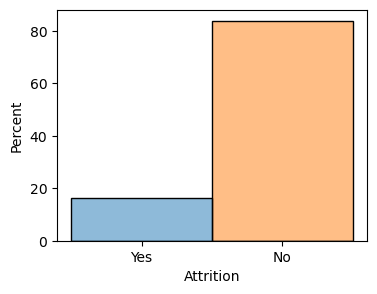

In [11]:
plt.figure(figsize=(4,3))
sns.histplot(data=project_df, x='Attrition', stat='percent', hue='Attrition' ,legend=False)
plt.show()

- ניתן לראות שפחות מ20 אחוז מהעובדים עזבו את עבודתם

#### We added 2 columns where we opened the attrition column to 2 columns by get_dummies for corelation:

In [12]:
dummy_df = pd.get_dummies(project_df['Attrition'])
dummy_df = dummy_df.rename(columns={'No': 'AttritionNo', 'Yes': 'AttritionYes'})
AttritionNo_values = dummy_df['AttritionNo'].tolist()
AttritionYes_values = dummy_df['AttritionYes'].tolist()
project_df["AttritionNo"] = AttritionNo_values
project_df["AttritionYes"] = AttritionYes_values
project_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AttritionNo,AttritionYes
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,8,0,1,6,4,0,5,0,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,1,10,3,3,10,7,1,7,1,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,7,3,3,0,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,0,8,3,3,8,7,3,0,1,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,1,6,3,3,2,2,2,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,1,17,3,3,5,2,0,3,1,0
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,9,5,3,7,7,1,7,1,0
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,1,6,0,3,6,2,0,3,1,0
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,0,17,3,2,9,6,0,8,1,0


---

<a id='section2'></a>
## <span style="color: green;">Salary and attrition by department</span> 
[back to top](#top)

<div>
<img src="https://github.com/YouLiveOnce/Employee-Attrition-and-Factors-data/blob/main/salary(photo).jpg?raw=true" width="400"/>
</div>

### Field investigation:

#### We explored the data by type of work Department 

In [13]:
Sciences_Sales= project_df.query('EducationField == "Life Sciences" & Department == "Sales"')
Medical_Sales= project_df.query('EducationField == "Medical" & Department == "Sales"')
Marketing_Sales= project_df.query('EducationField == "Marketing" & Department == "Sales"')
Technical_Sales= project_df.query('EducationField == "Technical Degree" & Department == "Sales"')
Other_Sales= project_df.query('EducationField == "Other" & Department == "Sales"')
#Human_Sales= project_df.query('EducationField == "Human Resources" & Department == "Sales"') = 0

Sciences_Research= project_df.query('EducationField == "Life Sciences" & Department == "Research & Development"')
Medical_Research= project_df.query('EducationField == "Medical" & Department == "Research & Development"')
#Marketing_Research= project_df.query('EducationField == "Marketing" & Department == "Research & Development"')= 0
Technical_Research= project_df.query('EducationField == "Technical Degree" & Department == "Research & Development"')
Other_Research= project_df.query('EducationField == "Other" & Department == "Research & Development"')
#Human_Research= project_df.query('EducationField == "Human Resources" & Department == "Research & Development"')= 0

Sciences_Human= project_df.query('EducationField == "Life Sciences" & Department == "Human Resources"')
Medical_Human= project_df.query('EducationField == "Medical" & Department == "Human Resources"')
#Marketing_Human= project_df.query('EducationField == "Marketing" & Department == "Human Resources"')=0
Technical_Human= project_df.query('EducationField == "Technical Degree" & Department == "Human Resources"')
Other_Human= project_df.query('EducationField == "Other" & Department == "Human Resources"')
Human_Human= project_df.query('EducationField == "Human Resources" & Department == "Human Resources"')


####  - sales department

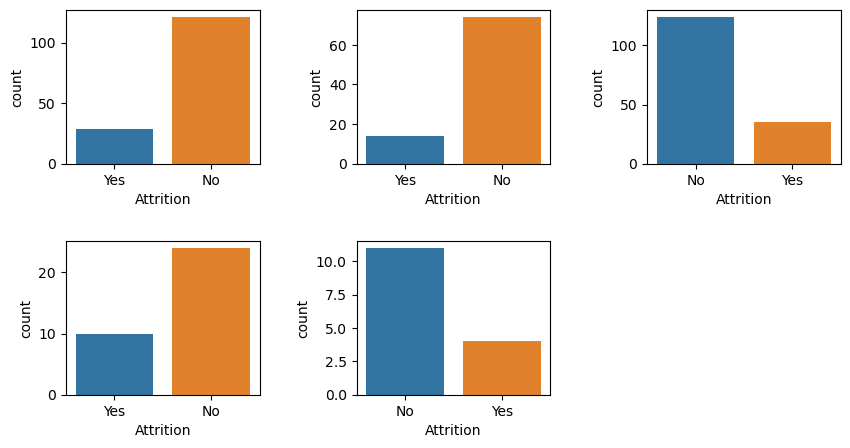

In [14]:
fig, ax = plt.subplots(2,3, figsize = (10,5))
plt.subplots_adjust(wspace = 0.5, hspace=0.5)
sns.countplot(x="Attrition", data=Sciences_Sales, ax = ax[0,0])
sns.countplot(x="Attrition", data=Medical_Sales, ax = ax[0,1])
sns.countplot(x="Attrition", data=Marketing_Sales, ax = ax[0,2])
sns.countplot(x="Attrition", data=Technical_Sales, ax = ax[1,0])
sns.countplot(x="Attrition", data=Other_Sales, ax = ax[1,1])
ax[1, 2].remove()

plt.show()

####  - Research & Development department

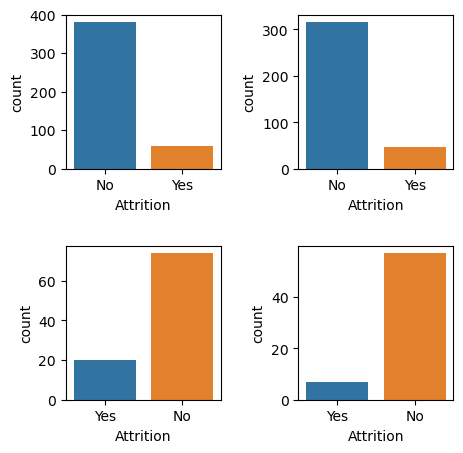

In [15]:
fig, ax = plt.subplots(2,2, figsize = (5,5))
plt.subplots_adjust(wspace = 0.5, hspace=0.5)
sns.countplot(x="Attrition", data=Sciences_Research, ax = ax[0,0])
sns.countplot(x="Attrition", data=Medical_Research, ax = ax[0,1])
sns.countplot(x="Attrition", data=Technical_Research, ax = ax[1,0])
sns.countplot(x="Attrition", data=Other_Research, ax = ax[1,1])

plt.show()

#### - Human Resources department

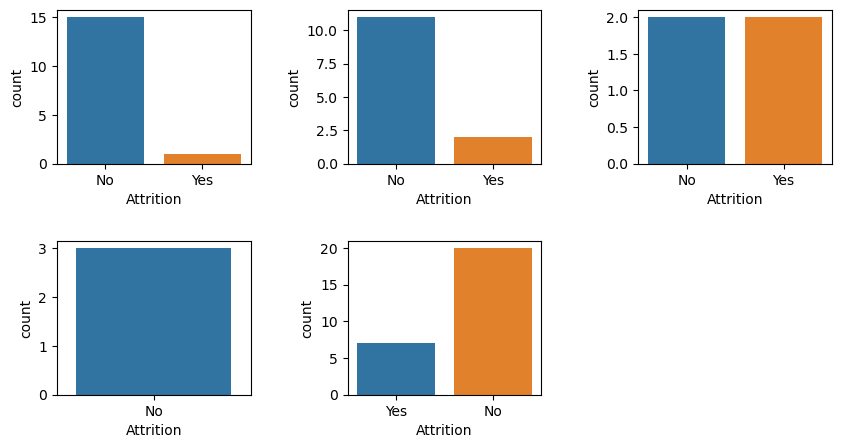

In [16]:
fig, ax = plt.subplots(2,3, figsize = (10,5))
plt.subplots_adjust(wspace = 0.5, hspace=0.5)
sns.countplot(x="Attrition", data=Sciences_Human, ax = ax[0,0])
sns.countplot(x="Attrition", data=Medical_Human, ax = ax[0,1])
sns.countplot(x="Attrition", data=Technical_Human, ax = ax[0,2])
sns.countplot(x="Attrition", data=Other_Human, ax = ax[1,0])
sns.countplot(x="Attrition", data=Human_Human, ax = ax[1,1])
ax[1, 2].remove()

plt.show()

### Investigation in a different direction

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

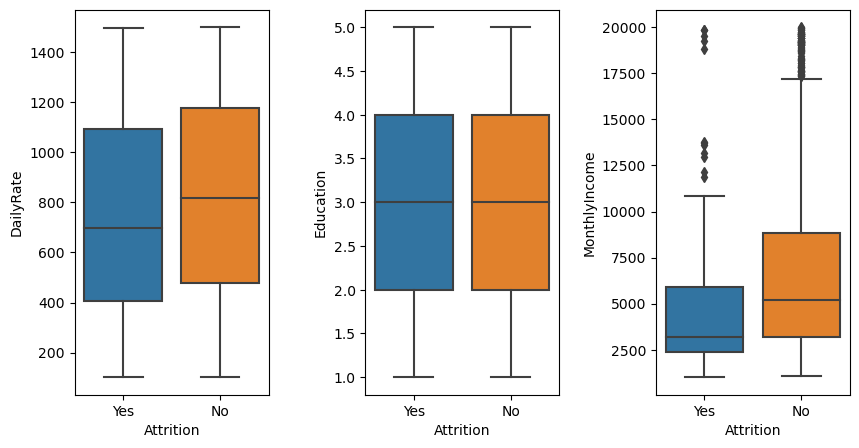

In [17]:
fig, ax = plt.subplots(1,3, figsize = (10,5))
plt.subplots_adjust(wspace = 0.5)
sns.boxplot(x='Attrition', y='DailyRate', data=project_df, ax = ax[0])
sns.boxplot(x='Attrition', y='Education', data=project_df, ax = ax[1])
sns.boxplot(x='Attrition', y='MonthlyIncome', data=project_df, ax = ax[2])


#### We explored the direction of attrition by salary

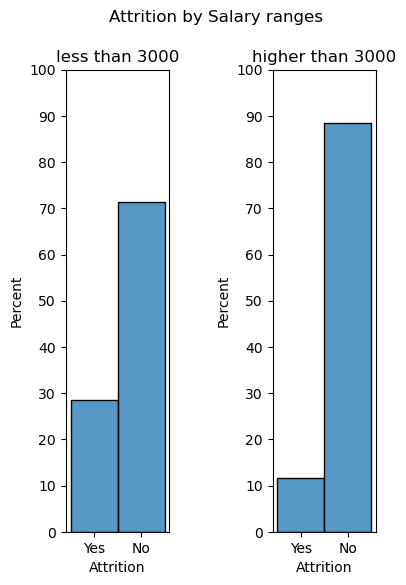

In [18]:
fig, ax = plt.subplots(1,2, figsize = (4,6))
plt.subplots_adjust(wspace = 1)
sns.histplot(x="Attrition", data=project_df[project_df['MonthlyIncome'] < 3000], ax = ax[0], stat='percent')
sns.histplot(x="Attrition", data=project_df[project_df['MonthlyIncome'] > 3000], ax = ax[1], stat='percent')
ax[0].set_title("less than 3000")
ax[1].set_title("higher than 3000")
fig.suptitle("Attrition by Salary ranges", fontsize=12)
ax[0].set_yticks(range(0,110,10))
ax[1].set_yticks(range(0,110,10))

plt.show()

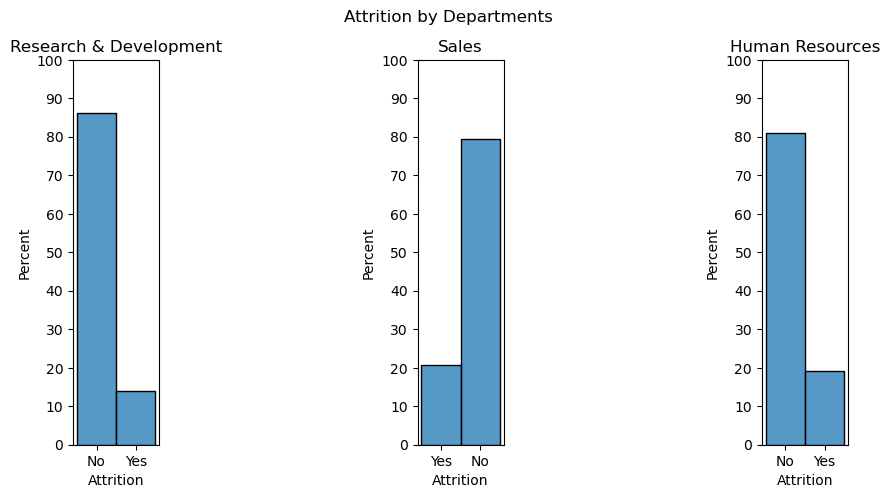

In [69]:
fig, ax = plt.subplots(1,3, figsize = (10,5))
plt.subplots_adjust(wspace = 3)
sns.histplot(x="Attrition", data=project_df[(project_df.Department == 'Research & Development')] , ax = ax[0], stat='percent')
sns.histplot(x="Attrition", data=project_df[(project_df.Department == 'Sales')], ax = ax[1], stat='percent')
sns.histplot(x="Attrition", data=project_df[(project_df.Department == 'Human Resources')], ax = ax[2], stat='percent')
ax[0].set_title("Research & Development")
ax[1].set_title("Sales")
ax[2].set_title("Human Resources")
fig.suptitle("Attrition by Departments", fontsize=12)
ax[0].set_yticks(range(0,110,10))
ax[1].set_yticks(range(0,110,10))
ax[2].set_yticks(range(0,110,10))

plt.show()

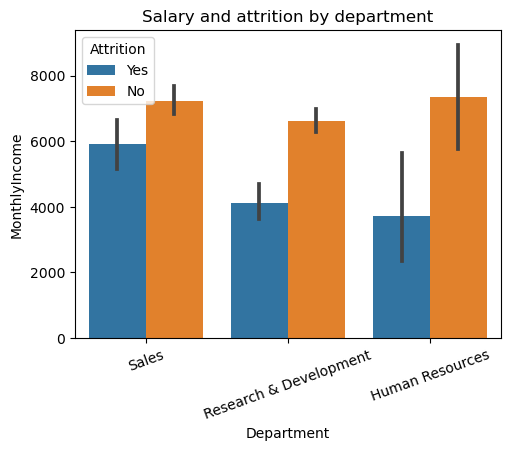

In [19]:
plt.figure(figsize=(5.5,4))
group_slice = project_df[(project_df.Department == 'Research & Development') | (project_df.Department == 'Sales')  | (project_df.Department == 'Human Resources')]
ax = sns.barplot(data = group_slice, x='Department', y='MonthlyIncome', hue = 'Attrition')
plt.xticks(rotation=20)
ax.set_title("Salary and attrition by department")
plt.legend(title='Attrition', loc=('upper left'))
plt.show()

---
#### <span style="color:blue"> Conclusion of the investigation:</span>
מתהליך חקירה זה ראינו בתחילה שיש הבדל בערך המשכורת החציונית בין אלו שנשחקו ועזבו את החברה לבין אלו שלא. 
לאחר מכן, לפי החציון החלטנו לבדוק את טווחי השכר בהקשר לשחיקה. ראינו שיש הבדל של בערך 20% באחוזי העובדים השחוקים בעקבות טווחי השכר השונים.
לבסוף, הגענו לגרף הסופי שהראה לנו כי השכר של כל מי שנשאר בחברה הוא יחסית זהה בכל המחלקות. אבל, למרות שהשכר של העוזבים במחלקת מכירות הוא הכי גבוה אנו רואים שעדיין אחוזי העזיבה שלהם הכי גבוהים מבין שאר המחלקות.
מכאן ניתן להסיק כי מחלקת המכירות הינה המחלקה שהשחיקה בה היא מעבר לשכר, זה מוכיח לנו שבמחלקה זו העבודה היא שוחקת וקשה יותר לעומת מחלקות אחרות. 


---

<a id='section3'></a>
## <span style="color: green;">The effect of age on attrition</span> 
[back to top](#top)

<div>
<img src="https://github.com/YouLiveOnce/Employee-Attrition-and-Factors-data/blob/main/age%20(photo).jpg?raw=true" width="400"/>
</div>

### Field investigation:

#### We checked correlation
(the categorical column called "Attrition" has already been adjusted for correlation by get_dummies)

In [20]:
features_2 = ['JobLevel','MonthlyIncome', 'Age',"AttritionNo" , "AttritionYes" ]

In [21]:
new_data_2 = project_df[features_2]
new_data_2.dtypes

JobLevel         int64
MonthlyIncome    int64
Age              int64
AttritionNo      int64
AttritionYes     int64
dtype: object

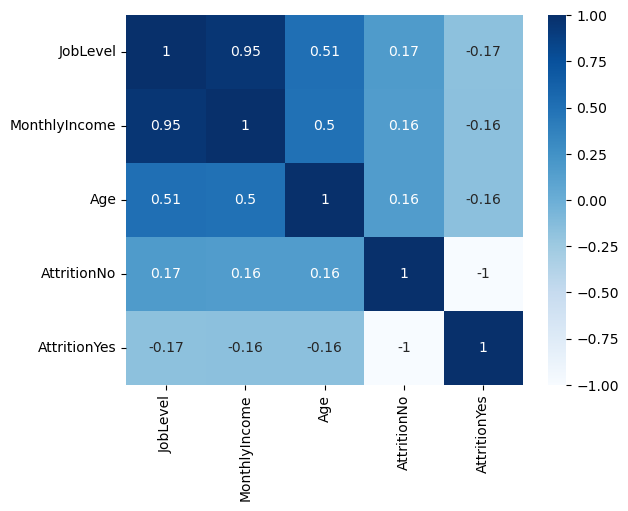

In [22]:
corr_2 = new_data_2[features_2].corr()
sns.heatmap(corr_2, annot=True, cmap='Blues')
plt.show()

It can be seen that there are strong relationships between promotion and the monthly salary, between age and the monthly salary, and between age and the level of the position

#### We examined the connections around the maritial situation

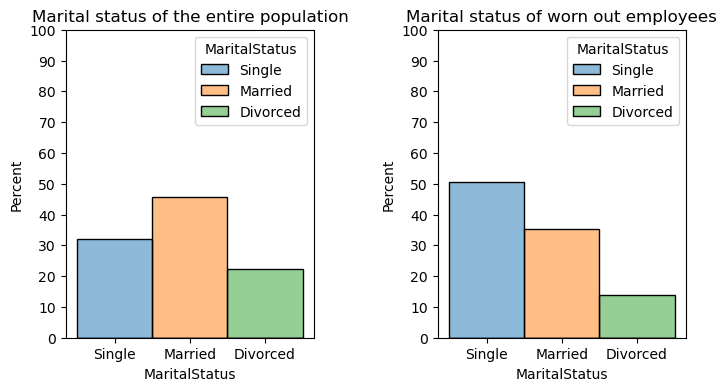

In [23]:
fig, ax = plt.subplots(1,2, figsize=(8,4))
plt.subplots_adjust(wspace = 0.5)

sns.histplot(data=project_df, x="MaritalStatus", stat="percent" , ax = ax[0], hue = "MaritalStatus")
ax[0].set_title("Marital status of the entire population")
sns.histplot(data=project_Yes_df, x="MaritalStatus",stat="percent" , ax = ax[1], hue = "MaritalStatus")
ax[1].set_title("Marital status of worn out employees")
ax[0].set_yticks(range(0,110,10))
ax[1].set_yticks(range(0,110,10))

plt.show()

From these graphs it can be understood that half of the employees who left are single. We note that singles make up a third of the company's employees

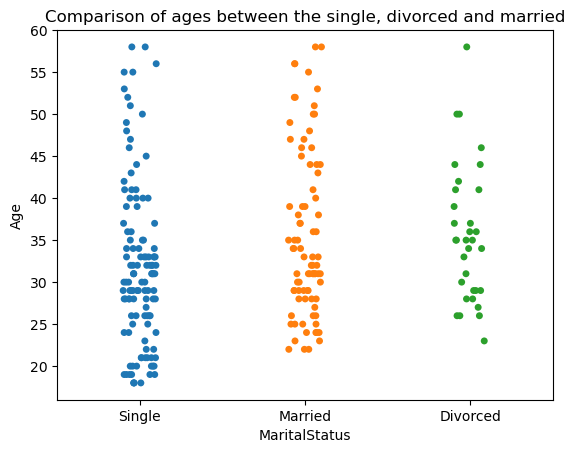

In [24]:
sns.stripplot(x = "MaritalStatus", y = 'Age', data = project_Yes_df )
plt.xlabel('MaritalStatus')
plt.ylabel('Age')
plt.title('Comparison of ages between the single, divorced and married')
plt.show()

In [25]:
project_df[["Over18"]].value_counts()

Over18
Y         1470
dtype: int64

It can be seen that there is a significant mass of singles younger than the age of 20 (recall that they are all over 18) and up to the age of 35 when they have left their jobs, it is interesting to understand the reason for this since they are still young and should be fresh in the economy

#### From this point, we tried to focus on the investigation of the data on fields of ages and the relationship between these and attrition at work.
> At this point we will define all the people by age groups
>

In [26]:
age_bins = [18, 25, 35, 45, 60]
age_labels = ['18-25', '26-35', '36-45', '46-60']
project_df['AgeGroup'] = pd.cut(project_df['Age'], bins=age_bins, labels=age_labels, right=False)

In [27]:
age_percentages = project_df['AgeGroup'].value_counts(normalize=True) * 100
age_percentages

26-35    37.81570
36-45    34.47099
46-60    21.09215
18-25     6.62116
Name: AgeGroup, dtype: float64

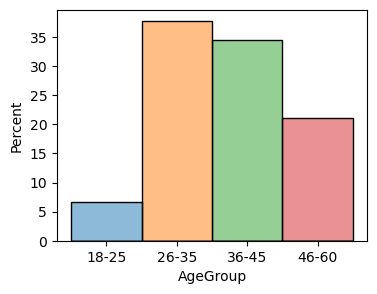

In [28]:
plt.figure(figsize=(4,3))
sns.histplot(data=project_df, x='AgeGroup', stat='percent', hue='AgeGroup' ,legend=False)
plt.show()

#### We checked the percentages of people leaving the company by age groups

In [62]:
temporary_df = project_df.groupby(['Attrition', 'AgeGroup'])['EmployeeCount'].sum().reset_index()
print(temporary_df)
temporary_df['Total'] = temporary_df.groupby('Attrition')['EmployeeCount'].transform('sum')
temporary_df['Attrition_Percentage'] = (temporary_df['EmployeeCount'] / temporary_df['Total']) * 100

  Attrition AgeGroup  EmployeeCount
0        No    18-25             59
1        No    26-35            442
2        No    36-45            454
3        No    46-60            273
4       Yes    18-25             38
5       Yes    26-35            112
6       Yes    36-45             51
7       Yes    46-60             36


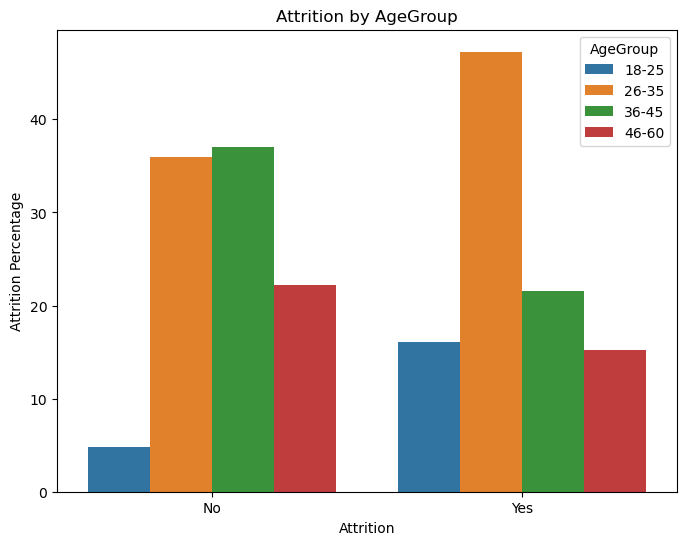

In [64]:
plt.figure(figsize=(8, 6))
sns.barplot(data=temporary_df, x='Attrition', y='Attrition_Percentage', hue='AgeGroup')
plt.xlabel('Attrition')
plt.ylabel('Attrition Percentage')
plt.title('Attrition by AgeGroup')
plt.show()

We will note that most of those who leave work are 26-35 years old 

#### We examined the reasons for the departure of 26-35 year olds

##### We examined the relationship between age and monthly salary

<AxesSubplot:xlabel='Age', ylabel='MonthlyIncome'>

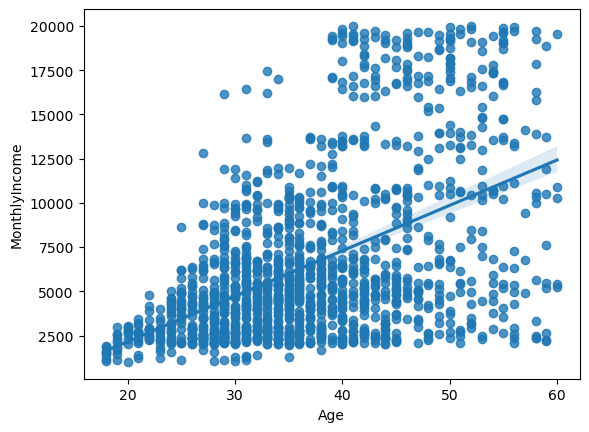

In [31]:
sns.regplot(data = project_df, x = 'Age', y = 'MonthlyIncome')

From the correlation we checked initially, it seems that there is a linear relationship between the age of the employee and his salary

##### We decided from now on to look at the reasons for leaving jobs according to specific data for the ages 26-35, due to the fact that they are the majority of those leaving jobs.
We examined several factors:
- Level of work involvement
- Several years since the last promotion
- Job level
- Marital Status
- Number of companies in which they worked

In [32]:
df_26_35 = project_df[project_df["AgeGroup"] == "26-35"]

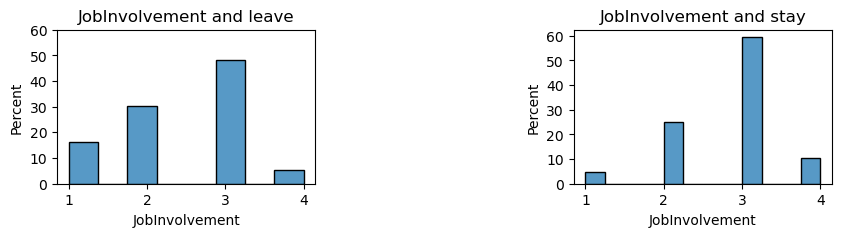

In [33]:
fig, ax = plt.subplots(1,2, figsize=(10,2))
plt.subplots_adjust(wspace = 1)

sns.histplot(data=df_26_35[(df_26_35.Attrition == "Yes")], x = 'JobInvolvement', stat='percent',ax = ax[0])
ax[0].set_title("JobInvolvement and leave")
sns.histplot(data=df_26_35[(df_26_35.Attrition == "No")], x = 'JobInvolvement', stat='percent',ax = ax[1])
ax[1].set_title("JobInvolvement and stay")
ax[0].set_yticks(range(0,70,10))
ax[1].set_yticks(range(0,70,10))

plt.show()

Their involvement in work is relatively the same between those who left and those who did not

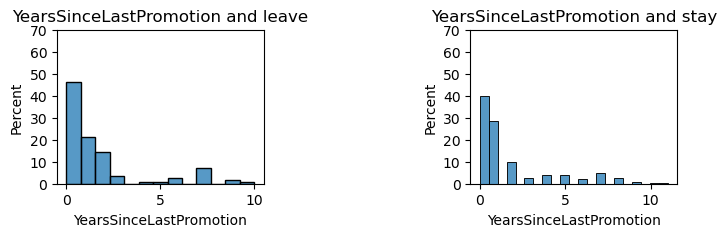

In [34]:
fig, ax = plt.subplots(1,2, figsize=(8,2))
plt.subplots_adjust(wspace = 1)

sns.histplot(data=df_26_35[(df_26_35.Attrition == "Yes")], x = 'YearsSinceLastPromotion', stat='percent',ax = ax[0])
ax[0].set_title("YearsSinceLastPromotion and leave")
sns.histplot(data=df_26_35[(df_26_35.Attrition == "No")], x = 'YearsSinceLastPromotion', stat='percent',ax = ax[1])
ax[1].set_title("YearsSinceLastPromotion and stay")
ax[0].set_yticks(range(0,80,10))
ax[1].set_yticks(range(0,80,10))

plt.show()

It can be seen that the years since the last promotion do not make a significant difference between those who left and those who did not

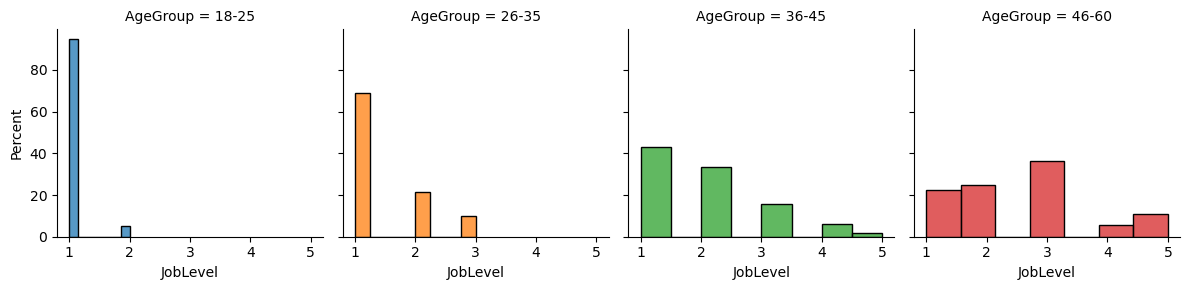

In [35]:
df_grid = sns.FacetGrid(project_df[(project_df.Attrition == "Yes")], col="AgeGroup", hue="AgeGroup", col_wrap=4)
df_grid.map_dataframe(sns.histplot, x="JobLevel", stat='percent')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


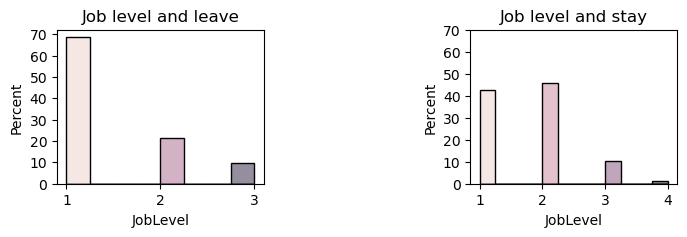

In [36]:
fig, ax = plt.subplots(1,2, figsize=(8,2))
plt.subplots_adjust(wspace = 1)

sns.histplot(data=df_26_35[(df_26_35.Attrition == "Yes")], x = 'JobLevel', stat='percent', hue = 'JobLevel',ax = ax[0])
ax[0].set_title("Job level and leave")
sns.histplot(data=df_26_35[(df_26_35.Attrition == "No")], x = 'JobLevel', stat='percent', hue = 'JobLevel',ax = ax[1])
ax[1].set_title("Job level and stay")
ax[0].set_yticks(range(0,80,10))
ax[1].set_yticks(range(0,80,10))
for ax in plt.gcf().get_axes():
    ax.legend().remove()
plt.show()

It can be seen that the 26-35 years old who are worn out and left, almost 70% of them were at job level 1 (the lowest)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


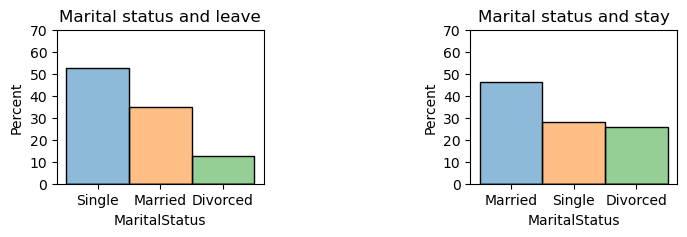

In [37]:
fig, ax = plt.subplots(1,2, figsize=(8,2))
plt.subplots_adjust(wspace = 1)

sns.histplot(data=df_26_35[(df_26_35.Attrition == "Yes")], x = 'MaritalStatus', stat='percent', hue = 'MaritalStatus',ax = ax[0])
ax[0].set_title("Marital status and leave")
sns.histplot(data=df_26_35[(df_26_35.Attrition == "No")], x = 'MaritalStatus', stat='percent', hue = 'MaritalStatus',ax = ax[1])
ax[1].set_title("Marital status and stay")
order = ["Single","Married","Divorced"]
ax[0].set_yticks(range(0,80,10))
ax[1].set_yticks(range(0,80,10))
for ax in plt.gcf().get_axes():
    ax.legend().remove()
plt.show()

It can be seen that half of the people who left their jobs are single

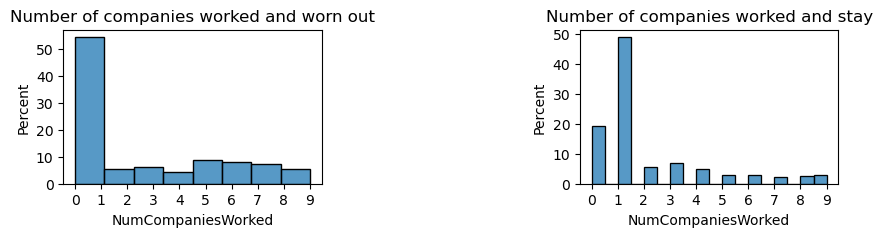

In [38]:
fig, ax = plt.subplots(1,2, figsize=(10,2))
plt.subplots_adjust(wspace = 1)

sns.histplot(data=df_26_35[(df_26_35.Attrition == "Yes")], x = 'NumCompaniesWorked', stat='percent',ax = ax[0])
ax[0].set_title("Number of companies worked and worn out")
sns.histplot(data=df_26_35[(df_26_35.Attrition == "No")], x = 'NumCompaniesWorked', stat='percent',ax = ax[1])
ax[1].set_title("Number of companies worked and stay")
ax[0].set_yticks(range(0,60,10))
ax[1].set_yticks(range(0,60,10))
ax[0].set_xticks(range(0,10,1))
ax[1].set_xticks(range(0,10,1))

plt.show()

Half of the 26-35 years old who left their jobs were employed for the first time.

---
#### <span style="color:blue"> Conclusion of the investigation:</span>
בני 26-35 הם רוב העובדים שעזבו את החברה

:ניתן להניח שהגורמים לכך הם
- רמת תפקיד נמוכה בעבודה 
- זאת החברה הראשונה בה הם עבדו
- מחצית מהם הינם רווקים כך שאין להם מחוייבות כלכלית כלפי משק בית ומשפחה

---

<a id='section4'></a>
## <span style="color: green;">Attrition acording to types of job roles</span> 
[back to top](#top)

<div>
<img src="https://github.com/YouLiveOnce/Employee-Attrition-and-Factors-data/blob/main/job%20role%20(photo).jpeg?raw=true" width="400"/>
</div>

### Field investigation:

#### We built a graph of the types of jobs in the company and the attrition in percentages

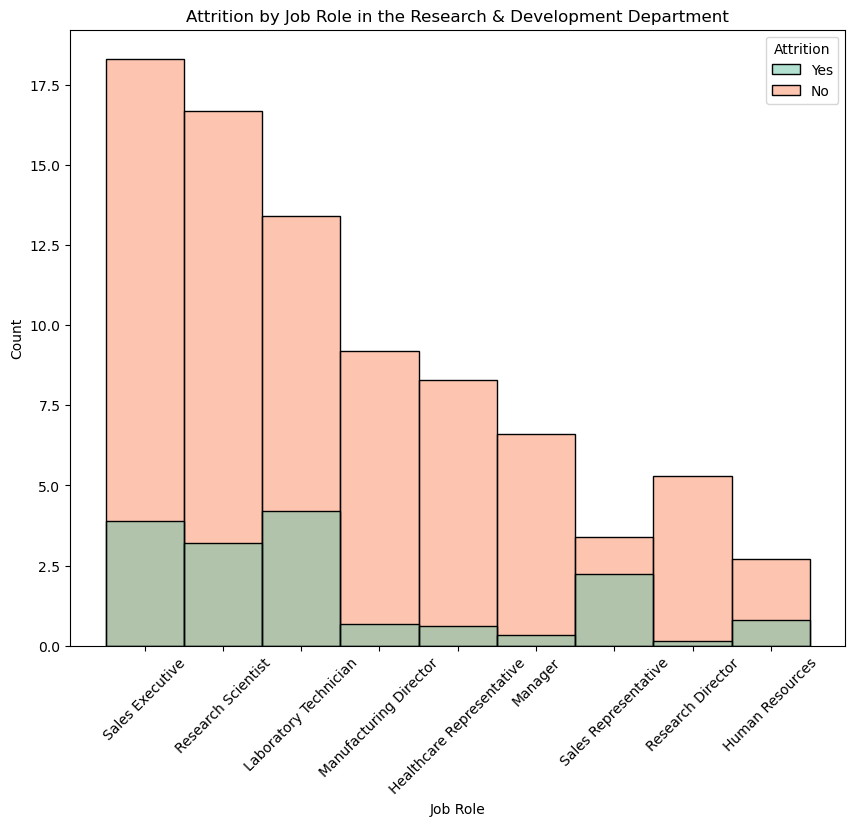

In [39]:
plt.figure(figsize=(10, 8))
sns.histplot(data=project_df, x='JobRole',hue='Attrition', palette='Set2',stat='percent')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.title('Attrition by Job Role in the Research & Development Department')
plt.xticks(rotation=45)

plt.show()

#### We focused on the sales representative job
##### We found that one of the lowest salaries in the company is the sales representative job

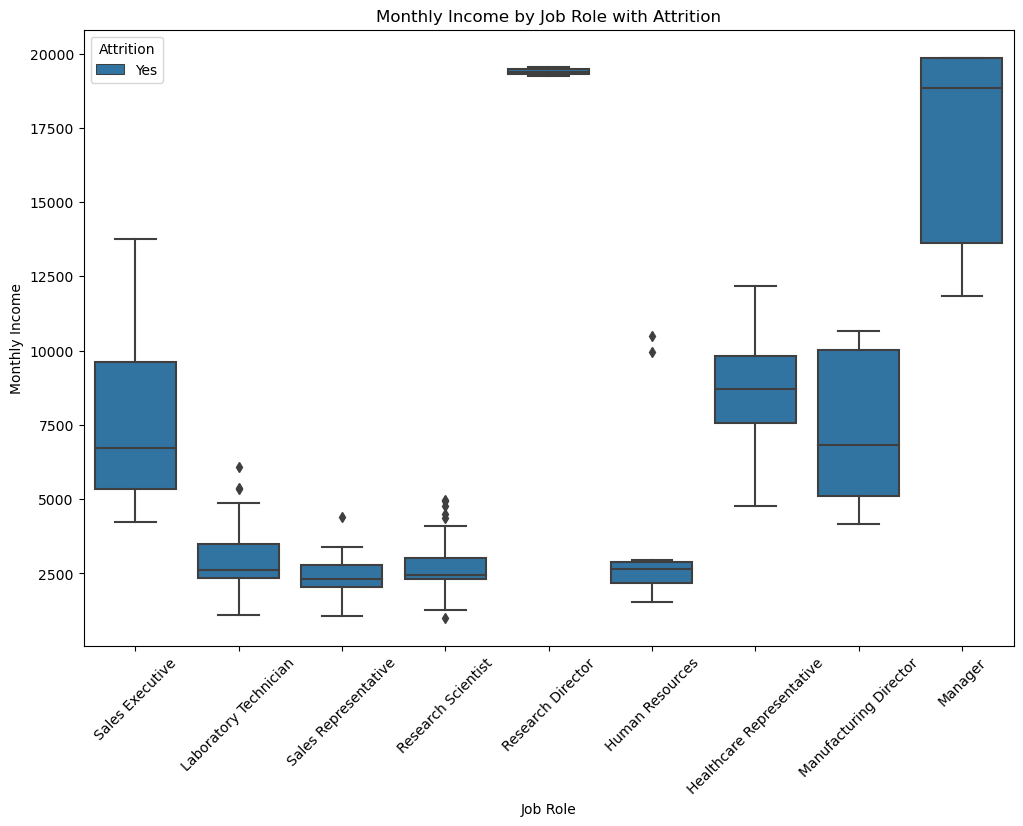

In [40]:
attrition_data = project_df[project_df['Attrition'] == 'Yes']
plt.figure(figsize=(12, 8))
sns.boxplot(data=attrition_data, x='JobRole', y='MonthlyIncome', hue='Attrition')
plt.xlabel('Job Role')
plt.ylabel('Monthly Income')
plt.title('Monthly Income by Job Role with Attrition')
plt.xticks(rotation=45)
plt.show()

##### We checked the percentage of the departures according to the number of years that the employees worked in total

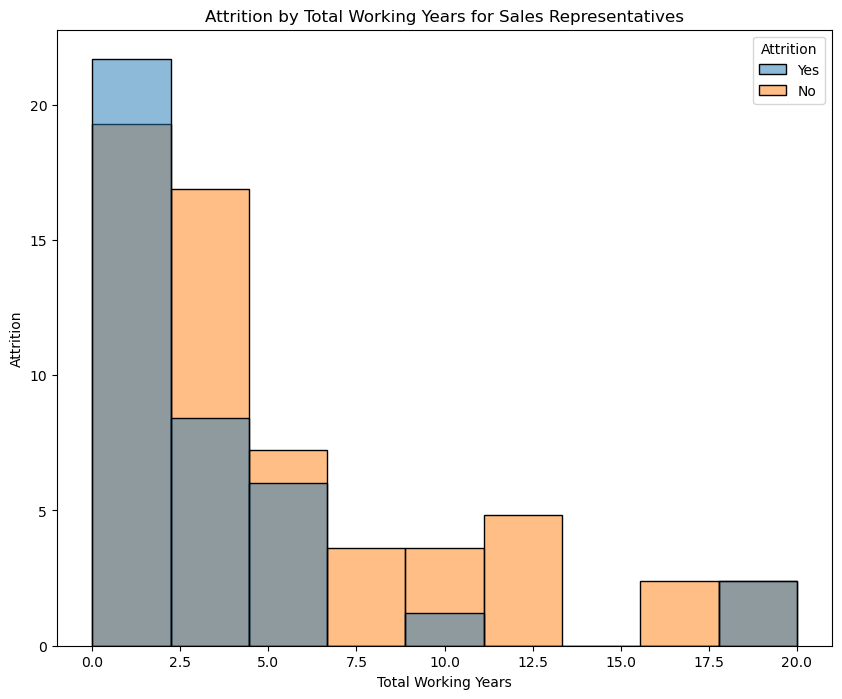

In [41]:
sales_rep_data = project_df[project_df['JobRole'] == 'Sales Representative']
plt.figure(figsize=(10, 8))
sns.histplot(data=sales_rep_data, x='TotalWorkingYears', hue='Attrition',stat='percent')
plt.xlabel('Total Working Years')
plt.ylabel('Attrition')
plt.title('Attrition by Total Working Years for Sales Representatives')
plt.show()

##### We checked the age range of the employees and the former employees

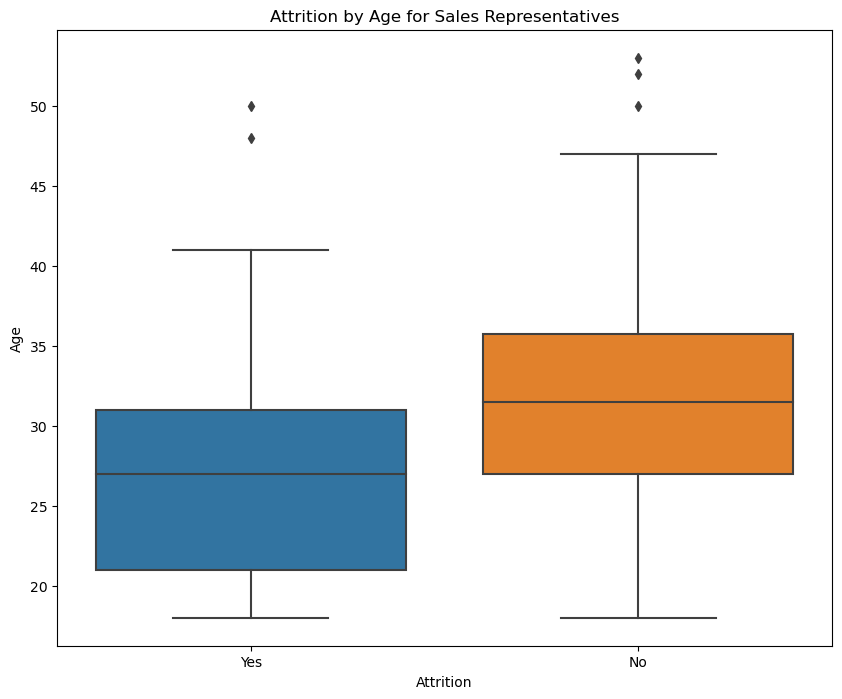

In [42]:
sales_rep_data = project_df[project_df['JobRole'] == 'Sales Representative']
plt.figure(figsize=(10, 8))
sns.boxplot(data=sales_rep_data, y='Age', x='Attrition')
plt.ylabel('Age')
plt.xlabel('Attrition')
plt.title('Attrition by Age for Sales Representatives')
plt.show()

##### We checked how many years the former employees from the sales representative had been with the company

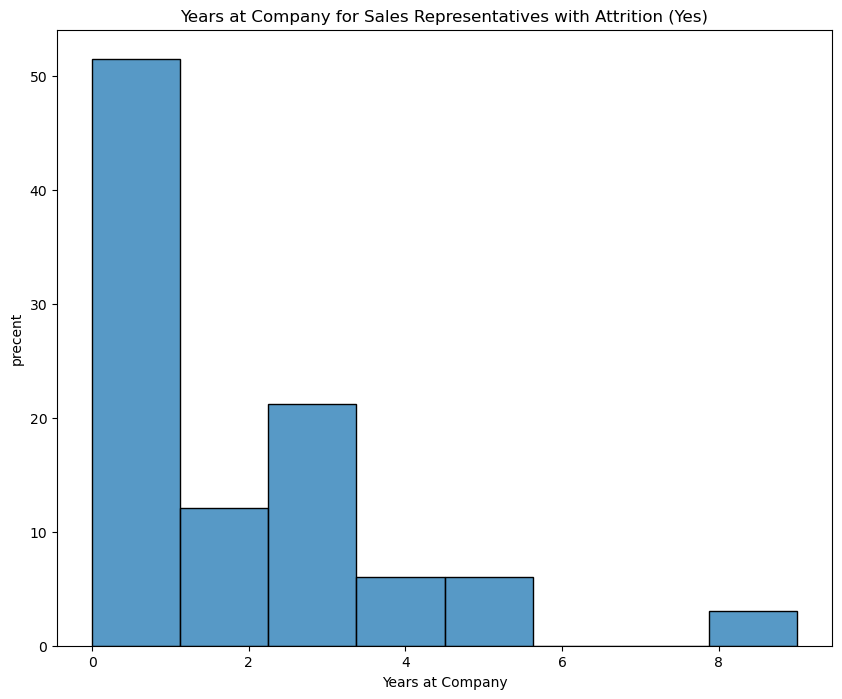

In [43]:
sales_rep_data = project_df[project_df['JobRole'] == 'Sales Representative']
attrition_yes_data = sales_rep_data[sales_rep_data['Attrition'] == 'Yes']
plt.figure(figsize=(10, 8))
sns.histplot(data=attrition_yes_data, x='YearsAtCompany',stat='percent')
plt.xlabel('Years at Company')
plt.ylabel('precent')
plt.title('Years at Company for Sales Representatives with Attrition (Yes)')
plt.show()

---
#### <span style="color:blue"> Conclusion of the investigation:</span>

מתהליך חקירה זה ניתן לראות כי ביחס לתחומי העבודה השונים, בתפקיד המכירות נמצאה העזיבה הגדולה ביותר

:הסיבות לכך הן
- המשכורת החציונית היא הנמוכה ביותר וטווח המשכורות נמוך מאוד
- רוב העובדים שעזבו הם בגיליאים צעירים והיו מעט שנים בחברה

---

<a id='section5'></a>
## <span style="color: green;">The differences between males and females on attrition</span>
[back to top](#top)

<div>
<img src="https://github.com/YouLiveOnce/Employee-Attrition-and-Factors-data/blob/main/Males%20and%20females%20(photo).jpg?raw=true" width="400"/>
</div>

### Field investigation:

#### A basic investigation of the data according to males and females

In [44]:
len(project_df[project_df.Gender == 'Female'])

588

In [45]:
project_df["Gender"]

0       Female
1         Male
2         Male
3       Female
4         Male
         ...  
1465      Male
1466      Male
1467      Male
1468      Male
1469      Male
Name: Gender, Length: 1470, dtype: object

In [46]:
len(project_df[project_df.Gender == 'Female'])

588

In [47]:
len(project_df[project_df.Gender == 'Male'])

882

In [48]:
project_female = project_df[project_df.Gender == 'Female']

In [49]:
len(project_female[project_female.Attrition == 'Yes'])

87

In [50]:
project_female["MonthlyIncome"].mean()

6686.566326530612

In [51]:
project_male = project_df[project_df.Gender == 'Male']

In [52]:
len(project_male[project_male.Attrition == 'Yes'])

150

In [53]:
project_male["MonthlyIncome"].mean()

6380.507936507936

In [54]:
project_female["DistanceFromHome"]

0        1
3        3
6        3
11      15
15      21
        ..
1457     2
1458     1
1460    28
1462    24
1464     5
Name: DistanceFromHome, Length: 588, dtype: int64

#### entered the field of distance from home

<AxesSubplot:>

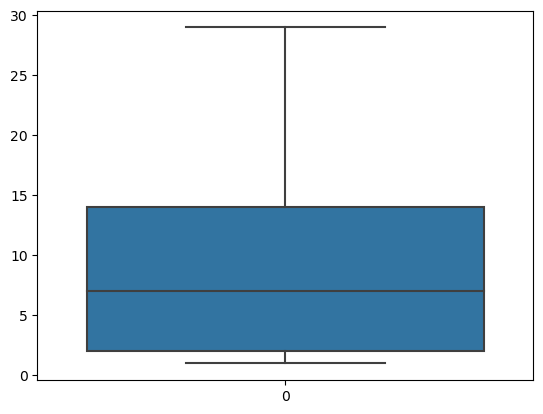

In [55]:
sns.boxplot(data = project_female["DistanceFromHome"])

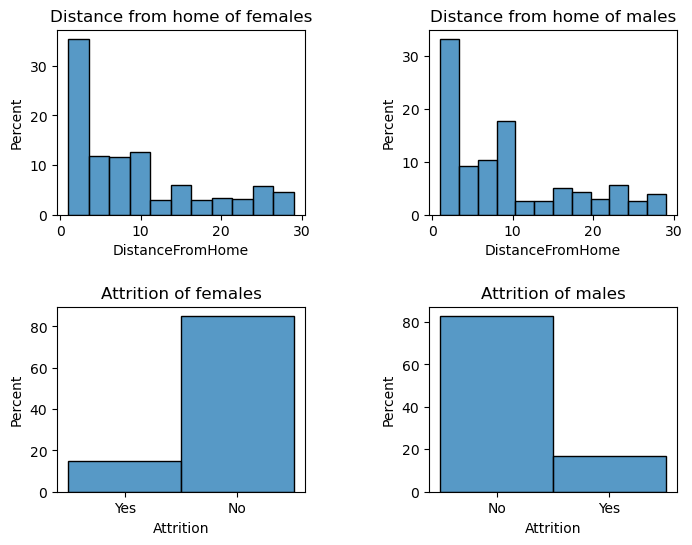

In [56]:
fig, ax = plt.subplots(2,2, figsize = (8,6))
plt.subplots_adjust(wspace = 0.5, hspace=0.5)

sns.histplot(data =project_female , x="DistanceFromHome",stat="percent",ax = ax[0,0] )
sns.histplot(data =project_male , x="DistanceFromHome",stat="percent",ax = ax[0,1] )
sns.histplot(data =project_female ,x="Attrition",stat="percent",ax = ax[1,0] )
sns.histplot(data =project_male ,x="Attrition",stat="percent",ax = ax[1,1] )
ax[0,0].set_title("Distance from home of females")
ax[0,1].set_title("Distance from home of males")
ax[1,0].set_title("Attrition of females")
ax[1,1].set_title("Attrition of males")
plt.show()

#### We examined the monthly rate

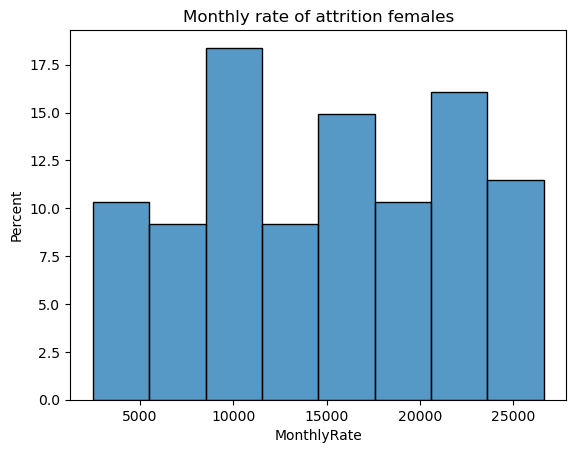

In [57]:
project_female_yes=project_female[(project_female.Attrition=="Yes")]
sns.histplot(data =project_female_yes,x="MonthlyRate",stat="percent")
plt.title("Monthly rate of attrition females")
plt.show()

#### We tried to focus on the field of business travel

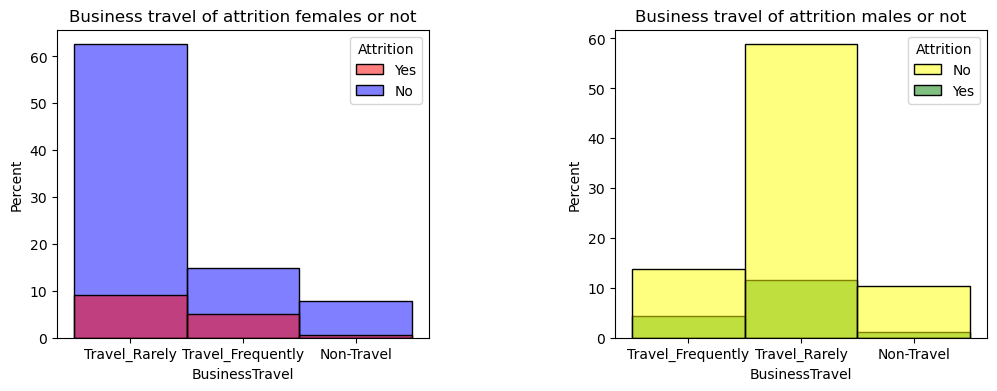

In [58]:
fig, ax = plt.subplots(1,2, figsize = (12,4))
plt.subplots_adjust(wspace = 0.5)

sns.histplot(data =project_female , x="BusinessTravel",stat="percent",hue="Attrition",ax = ax[0],palette=["red", "blue"])
sns.histplot(data =project_male , x="BusinessTravel",stat="percent",hue="Attrition",ax = ax[1],palette=["yellow", "green"])
ax[0].set_title("Business travel of attrition females or not")
ax[1].set_title("Business travel of attrition males or not")
plt.show()

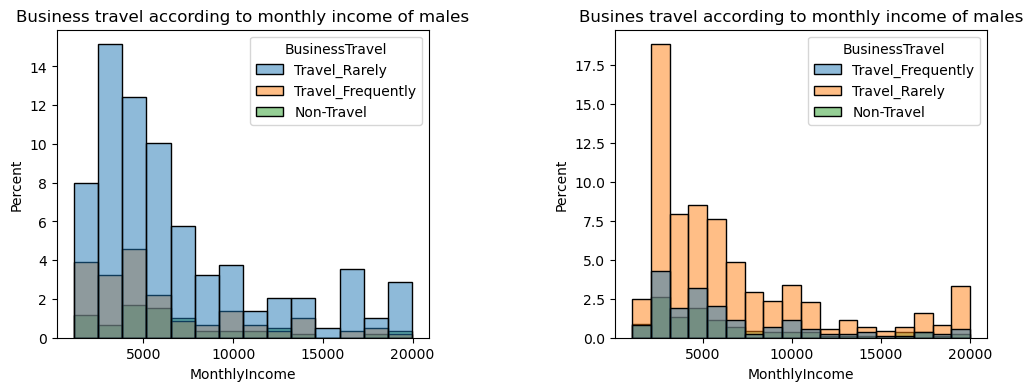

In [59]:
fig, ax = plt.subplots(1,2, figsize = (12,4))
plt.subplots_adjust(wspace = 0.5)

sns.histplot(data =project_female , hue="BusinessTravel",stat="percent",x="MonthlyIncome",ax = ax[0])
sns.histplot(data =project_male , hue="BusinessTravel",stat="percent",x="MonthlyIncome",ax = ax[1] )
ax[0].set_title("Business travel according to monthly income of males")
ax[1].set_title("Busines travel according to monthly income of males")
plt.show()

#### At this stage, we created a variety of comparisons between men and women according to different fields:

- Job role level
- Education
- monthly salary
- Business travel
- Distance from home
- Marital Status

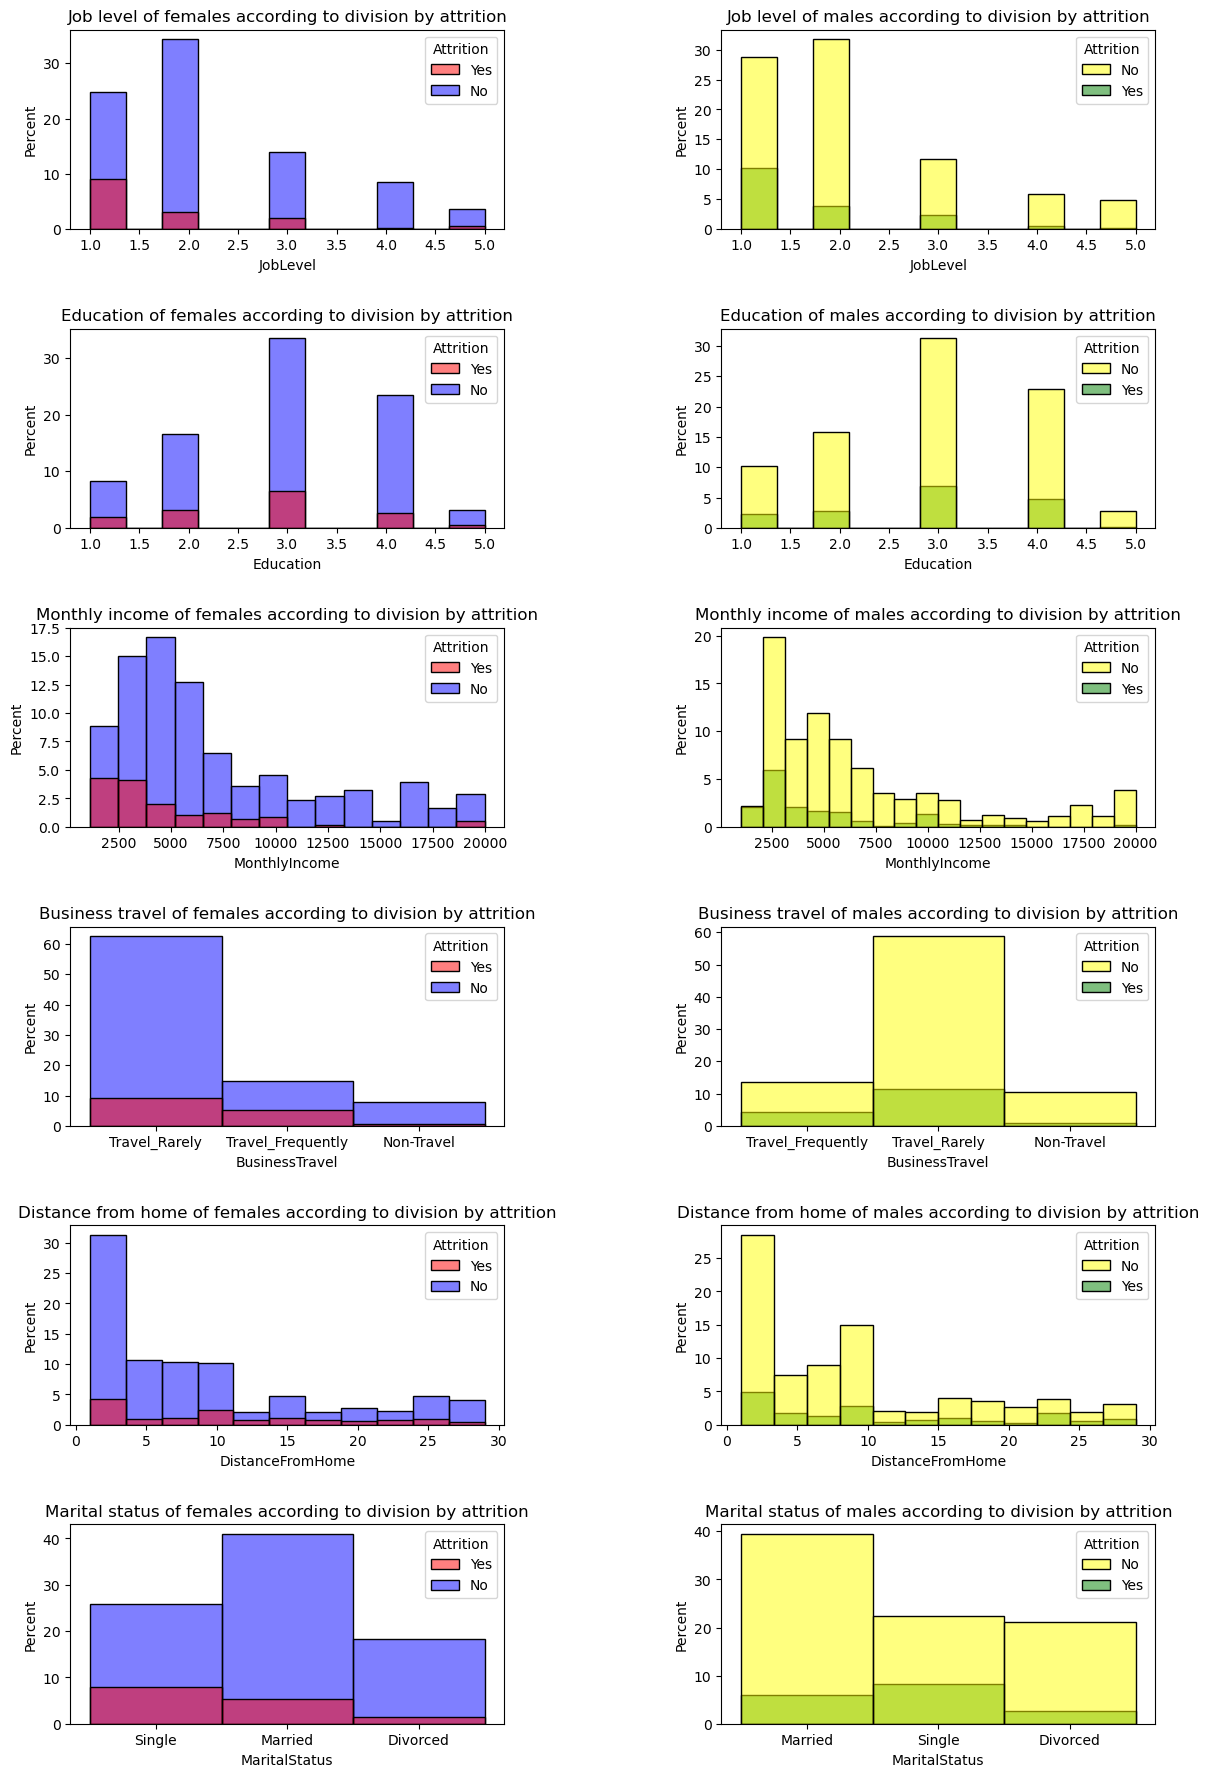

In [60]:
fig, ax = plt.subplots(6,2, figsize = (14,22))
plt.subplots_adjust(wspace = 0.5,hspace=0.5)

sns.histplot(data =project_female , x="JobLevel",stat="percent",hue="Attrition",ax = ax[0,0],palette=["red", "blue"])
sns.histplot(data =project_male , x="JobLevel",stat="percent",hue="Attrition",ax = ax[0,1],palette=["yellow", "green"] )

sns.histplot(data =project_female , x="Education",stat="percent",hue="Attrition",ax = ax[1,0],palette=["red", "blue"])
sns.histplot(data =project_male , x="Education",stat="percent",hue="Attrition",ax = ax[1,1],palette=["yellow", "green"] )

sns.histplot(data =project_female , x="MonthlyIncome",stat="percent",hue="Attrition",ax = ax[2,0],palette=["red", "blue"])
sns.histplot(data =project_male , x="MonthlyIncome",stat="percent",hue="Attrition",ax = ax[2,1],palette=["yellow", "green"] )

sns.histplot(data =project_female , x="BusinessTravel",stat="percent",hue="Attrition",ax = ax[3,0],palette=["red", "blue"])
sns.histplot(data =project_male , x="BusinessTravel",stat="percent",hue="Attrition",ax = ax[3,1],palette=["yellow", "green"])

sns.histplot(data =project_female , x="DistanceFromHome",stat="percent",hue="Attrition",ax = ax[4,0],palette=["red", "blue"])
sns.histplot(data =project_male , x="DistanceFromHome",stat="percent",hue="Attrition",ax = ax[4,1],palette=["yellow", "green"])

sns.histplot(data =project_female , x="MaritalStatus",stat="percent",hue="Attrition",ax = ax[5,0],palette=["red", "blue"])
sns.histplot(data =project_male , x="MaritalStatus",stat="percent",hue="Attrition",ax = ax[5,1],palette=["yellow", "green"])

ax[0,0].set_title("Job level of females according to division by attrition")
ax[0,1].set_title("Job level of males according to division by attrition")
ax[1,0].set_title("Education of females according to division by attrition")
ax[1,1].set_title("Education of males according to division by attrition")
ax[2,0].set_title("Monthly income of females according to division by attrition")
ax[2,1].set_title("Monthly income of males according to division by attrition")
ax[3,0].set_title("Business travel of females according to division by attrition")
ax[3,1].set_title("Business travel of males according to division by attrition")
ax[4,0].set_title("Distance from home of females according to division by attrition")
ax[4,1].set_title("Distance from home of males according to division by attrition")
ax[5,0].set_title("Marital status of females according to division by attrition")
ax[5,1].set_title("Marital status of males according to division by attrition")
plt.show()

---
#### <span style="color:blue"> Conclusion of the investigation:</span>

מסקנה זו עוסקת בהבדלים בין נשים וגברים.
בכל אחד מהגרפים הנ"ל ניתן לראות שאין הבדל משמעותי בין נשים וגברים.
החקירה בוצעה על מגוון נושאים כמו, רמת חינוך, הכנסה חודשית. גם בעניינים הקשורים לזמן שהות בבית למשל, כמות טיסות עבודה ומרחק העבודה מהבית, המספרים בשני המינים דומים מאוד.
אפילו בעניין המצב המשפחתי הנתונים לא מראים משהו שונה.
כיום רבים, או יותר נכון רבות עוסקות בעניין זה, במטרה ליצור שיוויון מלא בין נשים וגברים.
מפתיע במיוחד לראות כי בחברה זו לא נמצא הבדל ניכר, נראה שהם חיים במין חברה אוטופית שבה יש שוויון. שבה השכר שווה, בתפקידים בכלל הרמות נמצאים שני המינים ועוד.
האם הם חיים בחברה אוטופית שכזו? או שמה הנתונים המוצגים לנו כיום לא לגמרי נכונים? לא יהיה ניתן לדעת כל עוד לא נחקור חברות ותחומים רבים נוספים,עבודה רבה עוד לפנינו.

---